In [1]:
# Imports
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
# Load in the dataset
dataset = pd.read_csv("dataset.csv")

In [3]:
dataset.head()

,MMM_TIMESERIES_ID,ORGANISATION_ID,ORGANISATION_VERTICAL,ORGANISATION_SUBVERTICAL,ORGANISATION_MARKETING_SOURCES,ORGANISATION_PRIMARY_TERRITORY_NAME,TERRITORY_NAME,DATE_DAY,CURRENCY_CODE,FIRST_PURCHASES,FIRST_PURCHASES_UNITS,FIRST_PURCHASES_ORIGINAL_PRICE,FIRST_PURCHASES_GROSS_DISCOUNT,ALL_PURCHASES,ALL_PURCHASES_UNITS,ALL_PURCHASES_ORIGINAL_PRICE,ALL_PURCHASES_GROSS_DISCOUNT,GOOGLE_PAID_SEARCH_SPEND,GOOGLE_SHOPPING_SPEND,GOOGLE_PMAX_SPEND,GOOGLE_DISPLAY_SPEND,GOOGLE_VIDEO_SPEND,META_FACEBOOK_SPEND,META_INSTAGRAM_SPEND,META_OTHER_SPEND,TIKTOK_SPEND,GOOGLE_PAID_SEARCH_CLICKS,GOOGLE_SHOPPING_CLICKS,GOOGLE_PMAX_CLICKS,GOOGLE_DISPLAY_CLICKS,GOOGLE_VIDEO_CLICKS,META_FACEBOOK_CLICKS,META_INSTAGRAM_CLICKS,META_OTHER_CLICKS,TIKTOK_CLICKS,GOOGLE_PAID_SEARCH_IMPRESSIONS,GOOGLE_SHOPPING_IMPRESSIONS,GOOGLE_PMAX_IMPRESSIONS,GOOGLE_DISPLAY_IMPRESSIONS,GOOGLE_VIDEO_IMPRESSIONS,META_FACEBOOK_IMPRESSIONS,META_INSTAGRAM_IMPRESSIONS,META_OTHER_IMPRESSIONS,TIKTOK_IMPRESSIONS,DIRECT_CLICKS,BRANDED_SEARCH_CLICKS,ORGANIC_SEARCH_CLICKS,EMAIL_CLICKS,REFERRAL_CLICKS,ALL_OTHER_CLICKS
0,596eef7c71f933d820d0e485935d0e8f,04769dac8b828ec7a85676d9e2bffe6f,Beauty & Fitness,Hair Care,"Google, Meta",US,All Territories,2022-07-29,USD,22,27,3837.980834,632.595555,27,32,4552.984240,846.593069,NaN,NaN,205.528905,NaN,NaN,233.75,NaN,NaN,NaN,NaN,NaN,255.0,NaN,NaN,163.0,NaN,NaN,NaN,NaN,NaN,31907.0,NaN,NaN,18997.0,NaN,NaN,NaN,139.0,NaN,300.0,1.0,61.0,40.0
1,596eef7c71f933d820d0e485935d0e8f,04769dac8b828ec7a85676d9e2bffe6f,Beauty & Fitness,Hair Care,"Google, Meta",US,All Territories,2022-07-30,USD,14,21,2747.998631,443.996522,17,26,3177.998032,613.806522,NaN,NaN,277.082025,NaN,NaN,248.84,NaN,NaN,NaN,NaN,NaN,348.0,NaN,NaN,128.0,NaN,NaN,NaN,NaN,NaN,44483.0,NaN,NaN,20188.0,NaN,NaN,NaN,209.0,NaN,442.0,8.0,110.0,62.0
2,596eef7c71f933d820d0e485935d0e8f,04769dac8b828ec7a85676d9e2bffe6f,Beauty & Fitness,Hair Care,"Google, Meta",US,All Territories,2022-07-31,USD,31,39,4567.998818,1185.197966,39,48,5468.998818,1504.997966,NaN,NaN,427.436429,NaN,NaN,274.51,NaN,NaN,NaN,NaN,NaN,405.0,NaN,NaN,148.0,NaN,NaN,NaN,NaN,NaN,58173.0,NaN,NaN,24718.0,NaN,NaN,NaN,262.0,NaN,427.0,631.0,108.0,65.0
3,596eef7c71f933d820d0e485935d0e8f,04769dac8b828ec7a85676d9e2bffe6f,Beauty & Fitness,Hair Care,"Google, Meta",US,All Territories,2022-08-01,USD,18,30,2878.982385,696.519993,22,34,3335.970202,754.410747,35.24,NaN,347.232798,NaN,NaN,270.06,NaN,NaN,NaN,48.0,NaN,320.0,NaN,NaN,163.0,NaN,NaN,NaN,890.0,NaN,55559.0,NaN,NaN,25076.0,NaN,NaN,NaN,247.0,NaN,400.0,117.0,125.0,68.0
4,596eef7c71f933d820d0e485935d0e8f,04769dac8b828ec7a85676d9e2bffe6f,Beauty & Fitness,Hair Care,"Google, Meta",US,All Territories,2022-08-02,USD,23,27,3107.993669,627.097427,28,33,3991.987441,934.011083,38.40,NaN,314.952971,NaN,NaN,257.62,NaN,NaN,NaN,46.0,NaN,330.0,NaN,NaN,127.0,NaN,NaN,NaN,702.0,NaN,47854.0,NaN,NaN,22688.0,NaN,NaN,NaN,255.0,NaN,425.0,37.0,146.0,65.0


In [4]:
dataset.describe()

,FIRST_PURCHASES,FIRST_PURCHASES_UNITS,FIRST_PURCHASES_ORIGINAL_PRICE,FIRST_PURCHASES_GROSS_DISCOUNT,ALL_PURCHASES,ALL_PURCHASES_UNITS,ALL_PURCHASES_ORIGINAL_PRICE,ALL_PURCHASES_GROSS_DISCOUNT,GOOGLE_PAID_SEARCH_SPEND,GOOGLE_SHOPPING_SPEND,GOOGLE_PMAX_SPEND,GOOGLE_DISPLAY_SPEND,GOOGLE_VIDEO_SPEND,META_FACEBOOK_SPEND,META_INSTAGRAM_SPEND,META_OTHER_SPEND,TIKTOK_SPEND,GOOGLE_PAID_SEARCH_CLICKS,GOOGLE_SHOPPING_CLICKS,GOOGLE_PMAX_CLICKS,GOOGLE_DISPLAY_CLICKS,GOOGLE_VIDEO_CLICKS,META_FACEBOOK_CLICKS,META_INSTAGRAM_CLICKS,META_OTHER_CLICKS,TIKTOK_CLICKS,GOOGLE_PAID_SEARCH_IMPRESSIONS,GOOGLE_SHOPPING_IMPRESSIONS,GOOGLE_PMAX_IMPRESSIONS,GOOGLE_DISPLAY_IMPRESSIONS,GOOGLE_VIDEO_IMPRESSIONS,META_FACEBOOK_IMPRESSIONS,META_INSTAGRAM_IMPRESSIONS,META_OTHER_IMPRESSIONS,TIKTOK_IMPRESSIONS,DIRECT_CLICKS,BRANDED_SEARCH_CLICKS,ORGANIC_SEARCH_CLICKS,EMAIL_CLICKS,REFERRAL_CLICKS,ALL_OTHER_CLICKS
count,132759.000000,1.327590e+05,1.327590e+05,1.327590e+05,132759.000000,1.327590e+05,1.327590e+05,1.327590e+05,96637.000000,78980.000000,61126.000000,18746.000000,7628.000000,8.011200e+04,2.681700e+04,23545.000000,3462.000000,96637.000000,78980.000000,61126.000000,18746.000000,7628.000000,80112.000000,26817.000000,23545.000000,3462.000000,9.663700e+04,7.898000e+04,6.112600e+04,1.874600e+04,7.628000e+03,8.011200e+04,2.681700e+04,2.354500e+04,3462.000000,98541.000000,88825.000000,122702.000000,118663.000000,121737.000000,121778.000000
mean,83.857599,5.193310e+02,6.462644e+04,5.094456e+03,124.536845,1.291123e+03,1.186526e+05,1.215327e+04,416.082224,837.683294,2028.057109,385.777631,2350.139795,8.808485e+03,9.177190e+03,24.303478,378.687825,235.912735,1051.711471,1040.922930,103.536434,143.369166,1658.404184,778.863035,3.426587,373.519931,4.468473e+03,1.492698e+05,1.010199e+05,1.953524e+04,3.372030e+04,9.754821e+04,6.584053e+04,1.724004e+03,43198.584922,580.888473,309.502449,569.754218,357.539284,255.566106,680.092472
std,345.347969,5.033012e+03,6.148369e+05,5.541766e+04,1496.001905,1.291308e+04,1.211315e+06,1.395501e+05,2519.605821,3628.118892,13206.822391,1831.222369,6628.287197,9.634900e+04,8.092734e+04,186.818237,513.058990,514.600316,1797.832672,2025.859978,411.536339,522.810220,2776.179141,1451.021513,12.673883,478.336275,1.350778e+04,2.601057e+05,1.706189e+05,7.542679e+04,8.042591e+04,1.846109e+05,1.273965e+05,2.913215e+04,58713.550984,1046.358097,670.680758,1190.888629,944.721232,817.485088,2331.667413
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,1.000000e+00,3.490000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,2.400000e+01,1.709675e+03,4.050000e+01,19.000000,3.400000e+01,2.546000e+03,6.994500e+01,15.240000,61.330000,101.470000,2.680000,19.570000,8.050201e+01,4.149000e+01,0.070000,25.450000,21.000000,80.000000,142.000000,7.000000,10.000000,152.000000,39.000000,0.000000,39.000000,2.780000e+02,1.108275e+04,1.309800e+04,1.358250e+03,1.851500e+03,9.420750e+03,3.400000e+03,1.300000e+01,4042.250000,93.000000,38.000000,94.000000,20.000000,19.000000,69.000000
50%,33.000000,6.600000e+01,5.262000e+03,1.950000e+02,49.000000,1.060000e+02,7.542000e+03,3.137500e+02,61.400000,245.950000,353.570000,12.800000,75.775000,2.828050e+02,2.474200e+02,0.520000,122.320000,72.000000,353.000000,398.000000,32.000000,38.000000,531.000000,216.000000,0.000000,177.500000,1.191000e+03,4.719550e+04,3.841150e+04,5.146000e+03,9.384500e+03,3.065900e+04,1.956700e+04,7.800000e+01,16886.000000,236.000000,116.000000,217.000000,72.000000,58.000000,205.000000
75%,98.000000,2.000000e+02,1.622458e+04,8.570809e+02,141.000000,3.130000e+02,2.319457e+04,1.277665e+03,198.150000,878.360000,942.493115,46.353061,334.790000,1.000610e+03,9.240000e+02,2.940000,497.520000,2

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132759 entries, 0 to 132758
Data columns (total 50 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   MMM_TIMESERIES_ID                    132759 non-null  object 
 1   ORGANISATION_ID                      132759 non-null  object 
 2   ORGANISATION_VERTICAL                124649 non-null  object 
 3   ORGANISATION_SUBVERTICAL             124649 non-null  object 
 4   ORGANISATION_MARKETING_SOURCES       132759 non-null  object 
 5   ORGANISATION_PRIMARY_TERRITORY_NAME  132759 non-null  object 
 6   TERRITORY_NAME                       132759 non-null  object 
 7   DATE_DAY                             132759 non-null  object 
 8   CURRENCY_CODE                        132759 non-null  object 
 9   FIRST_PURCHASES                      132759 non-null  int64  
 10  FIRST_PURCHASES_UNITS                132759 non-null  int64  
 11  FIRST_PURCHAS

In [6]:
dataset.isnull().sum()

MMM_TIMESERIES_ID                           0
ORGANISATION_ID                             0
ORGANISATION_VERTICAL                    8110
ORGANISATION_SUBVERTICAL                 8110
ORGANISATION_MARKETING_SOURCES              0
ORGANISATION_PRIMARY_TERRITORY_NAME         0
TERRITORY_NAME                              0
DATE_DAY                                    0
CURRENCY_CODE                               0
FIRST_PURCHASES                             0
FIRST_PURCHASES_UNITS                       0
FIRST_PURCHASES_ORIGINAL_PRICE              0
FIRST_PURCHASES_GROSS_DISCOUNT              0
ALL_PURCHASES                               0
ALL_PURCHASES_UNITS                         0
ALL_PURCHASES_ORIGINAL_PRICE                0
ALL_PURCHASES_GROSS_DISCOUNT                0
GOOGLE_PAID_SEARCH_SPEND                36122
GOOGLE_SHOPPING_SPEND                   53779
GOOGLE_PMAX_SPEND                       71633
GOOGLE_DISPLAY_SPEND                   114013
GOOGLE_VIDEO_SPEND                

In [7]:
# Count of unique values per column
dataset.nunique()

MMM_TIMESERIES_ID                         143
ORGANISATION_ID                            93
ORGANISATION_VERTICAL                      15
ORGANISATION_SUBVERTICAL                   36
ORGANISATION_MARKETING_SOURCES              5
ORGANISATION_PRIMARY_TERRITORY_NAME        12
TERRITORY_NAME                             19
DATE_DAY                                 1779
CURRENCY_CODE                              14
FIRST_PURCHASES                          1184
FIRST_PURCHASES_UNITS                    3606
FIRST_PURCHASES_ORIGINAL_PRICE         109362
FIRST_PURCHASES_GROSS_DISCOUNT          69935
ALL_PURCHASES                            1561
ALL_PURCHASES_UNITS                      4666
ALL_PURCHASES_ORIGINAL_PRICE           111447
ALL_PURCHASES_GROSS_DISCOUNT            77515
GOOGLE_PAID_SEARCH_SPEND                47228
GOOGLE_SHOPPING_SPEND                   48134
GOOGLE_PMAX_SPEND                       48330
GOOGLE_DISPLAY_SPEND                     8906
GOOGLE_VIDEO_SPEND                

In [8]:
# Define columns to impute and create dataset_imputed
columns_to_impute = [
    # Google spend
    'GOOGLE_PAID_SEARCH_SPEND','GOOGLE_SHOPPING_SPEND','GOOGLE_PMAX_SPEND','GOOGLE_DISPLAY_SPEND','GOOGLE_VIDEO_SPEND',
    # Google impressions
    'GOOGLE_PAID_SEARCH_IMPRESSIONS','GOOGLE_SHOPPING_IMPRESSIONS','GOOGLE_PMAX_IMPRESSIONS','GOOGLE_DISPLAY_IMPRESSIONS','GOOGLE_VIDEO_IMPRESSIONS',
    # Google clicks
    'GOOGLE_PAID_SEARCH_CLICKS','GOOGLE_SHOPPING_CLICKS','GOOGLE_PMAX_CLICKS','GOOGLE_DISPLAY_CLICKS','GOOGLE_VIDEO_CLICKS',
    # Meta spend
    'META_FACEBOOK_SPEND','META_INSTAGRAM_SPEND','META_OTHER_SPEND',
    # Meta impressions
    'META_FACEBOOK_IMPRESSIONS','META_INSTAGRAM_IMPRESSIONS','META_OTHER_IMPRESSIONS',
    # Meta clicks
    'META_FACEBOOK_CLICKS','META_INSTAGRAM_CLICKS','META_OTHER_CLICKS',
    # TikTok
    'TIKTOK_SPEND','TIKTOK_IMPRESSIONS','TIKTOK_CLICKS',
    # Other clicks
    'DIRECT_CLICKS','BRANDED_SEARCH_CLICKS','ORGANIC_SEARCH_CLICKS','EMAIL_CLICKS','REFERRAL_CLICKS','ALL_OTHER_CLICKS'
]

# Create a copy so I don't have to reload the original dataset every time I mess up (happened a couple of times)
dataset_imputed = dataset.copy()

# Fill NaNs with 0
dataset_imputed[columns_to_impute] = dataset_imputed[columns_to_impute].fillna(0)


In [9]:
# Make sure it worked
dataset_imputed.isnull().sum()

MMM_TIMESERIES_ID                         0
ORGANISATION_ID                           0
ORGANISATION_VERTICAL                  8110
ORGANISATION_SUBVERTICAL               8110
ORGANISATION_MARKETING_SOURCES            0
ORGANISATION_PRIMARY_TERRITORY_NAME       0
TERRITORY_NAME                            0
DATE_DAY                                  0
CURRENCY_CODE                             0
FIRST_PURCHASES                           0
FIRST_PURCHASES_UNITS                     0
FIRST_PURCHASES_ORIGINAL_PRICE            0
FIRST_PURCHASES_GROSS_DISCOUNT            0
ALL_PURCHASES                             0
ALL_PURCHASES_UNITS                       0
ALL_PURCHASES_ORIGINAL_PRICE              0
ALL_PURCHASES_GROSS_DISCOUNT              0
GOOGLE_PAID_SEARCH_SPEND                  0
GOOGLE_SHOPPING_SPEND                     0
GOOGLE_PMAX_SPEND                         0
GOOGLE_DISPLAY_SPEND                      0
GOOGLE_VIDEO_SPEND                        0
META_FACEBOOK_SPEND             

In [10]:
# Describe the data again to see new values
dataset_imputed.describe()


,FIRST_PURCHASES,FIRST_PURCHASES_UNITS,FIRST_PURCHASES_ORIGINAL_PRICE,FIRST_PURCHASES_GROSS_DISCOUNT,ALL_PURCHASES,ALL_PURCHASES_UNITS,ALL_PURCHASES_ORIGINAL_PRICE,ALL_PURCHASES_GROSS_DISCOUNT,GOOGLE_PAID_SEARCH_SPEND,GOOGLE_SHOPPING_SPEND,GOOGLE_PMAX_SPEND,GOOGLE_DISPLAY_SPEND,GOOGLE_VIDEO_SPEND,META_FACEBOOK_SPEND,META_INSTAGRAM_SPEND,META_OTHER_SPEND,TIKTOK_SPEND,GOOGLE_PAID_SEARCH_CLICKS,GOOGLE_SHOPPING_CLICKS,GOOGLE_PMAX_CLICKS,GOOGLE_DISPLAY_CLICKS,GOOGLE_VIDEO_CLICKS,META_FACEBOOK_CLICKS,META_INSTAGRAM_CLICKS,META_OTHER_CLICKS,TIKTOK_CLICKS,GOOGLE_PAID_SEARCH_IMPRESSIONS,GOOGLE_SHOPPING_IMPRESSIONS,GOOGLE_PMAX_IMPRESSIONS,GOOGLE_DISPLAY_IMPRESSIONS,GOOGLE_VIDEO_IMPRESSIONS,META_FACEBOOK_IMPRESSIONS,META_INSTAGRAM_IMPRESSIONS,META_OTHER_IMPRESSIONS,TIKTOK_IMPRESSIONS,DIRECT_CLICKS,BRANDED_SEARCH_CLICKS,ORGANIC_SEARCH_CLICKS,EMAIL_CLICKS,REFERRAL_CLICKS,ALL_OTHER_CLICKS
count,132759.000000,1.327590e+05,1.327590e+05,1.327590e+05,132759.000000,1.327590e+05,1.327590e+05,1.327590e+05,132759.000000,132759.000000,132759.000000,132759.000000,132759.000000,1.327590e+05,1.327590e+05,132759.000000,132759.000000,132759.000000,132759.000000,132759.000000,132759.000000,132759.000000,132759.000000,132759.000000,132759.000000,132759.000000,1.327590e+05,1.327590e+05,1.327590e+05,1.327590e+05,1.327590e+05,1.327590e+05,1.327590e+05,1.327590e+05,132759.000000,132759.000000,132759.000000,132759.000000,132759.000000,132759.000000,132759.000000
mean,83.857599,5.193310e+02,6.462644e+04,5.094456e+03,124.536845,1.291123e+03,1.186526e+05,1.215327e+04,302.871654,498.348334,933.774877,54.473049,135.033153,5.315386e+03,1.853770e+03,4.310257,9.875167,171.723943,625.676391,479.270370,14.619679,8.237634,1000.746285,157.328467,0.607710,9.740402,3.252660e+03,8.880251e+04,4.651241e+04,2.758439e+03,1.937484e+03,5.886442e+04,1.329963e+04,3.057546e+02,1126.503672,431.167235,207.078654,526.593165,319.576707,234.348338,623.839446
std,345.347969,5.033012e+03,6.148369e+05,5.541766e+04,1496.001905,1.291308e+04,1.211315e+06,1.395501e+05,2157.630213,2828.435831,9018.264126,701.094185,1680.223758,7.496896e+04,3.655771e+04,79.219395,102.491490,451.423822,1479.672287,1469.291164,158.787068,129.676984,2304.113798,723.236981,5.495413,97.510745,1.169484e+04,2.135843e+05,1.262482e+05,2.914747e+04,2.081315e+04,1.511388e+05,6.306408e+04,1.228590e+04,11716.027525,936.601416,567.595606,1154.776238,899.925795,785.984304,2240.998625
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,1.000000e+00,3.490000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,2.400000e+01,1.709675e+03,4.050000e+01,19.000000,3.400000e+01,2.546000e+03,6.994500e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,71.000000,10.000000,13.000000,43.000000
50%,33.000000,6.600000e+01,5.262000e+03,1.950000e+02,49.000000,1.060000e+02,7.542000e+03,3.137500e+02,23.780000,27.280000,0.000000,0.000000,0.000000,3.892000e+01,0.000000e+00,0.000000,0.000000,32.000000,38.000000,0.000000,0.000000,0.000000,86.000000,0.000000,0.000000,0.000000,4.500000e+02,5.205000e+03,0.000000e+00,0.000000e+00,0.000000e+00,5.929000e+03,0.000000e+00,0.000000e+00,0.000000,127.000000,39.000000,190.000000,54.000000,48.000000,172.000000
75%,98.000000,2.000000e+02,1.622458e+04,8.570809e+02,141.000000,3.130000e+02,2.319457e+04,1.277665e+03,127.000000,355.750000,288.475000,0.000000,0.000000,4.165100e+02,0.000000e+00,0.000000,0.000000,138.000000,514.000000,340.000000,0.000000,0.0

In [11]:
# Creating a new dataset with some columns that will be useful.
new_dataset = dataset_imputed.copy()

# Click columns
click_columns = ['GOOGLE_PAID_SEARCH_CLICKS','GOOGLE_SHOPPING_CLICKS','GOOGLE_PMAX_CLICKS','GOOGLE_DISPLAY_CLICKS','GOOGLE_VIDEO_CLICKS',
                'META_FACEBOOK_CLICKS','META_INSTAGRAM_CLICKS','META_OTHER_CLICKS','TIKTOK_CLICKS',
                'DIRECT_CLICKS','BRANDED_SEARCH_CLICKS','ORGANIC_SEARCH_CLICKS','EMAIL_CLICKS','REFERRAL_CLICKS','ALL_OTHER_CLICKS']

# Adding a new column which is the sum of the total clicks
new_dataset['TOTAL_CLICKS'] = new_dataset[click_columns].sum(axis=1)

# Impression columns
impression_columns = ['GOOGLE_PAID_SEARCH_IMPRESSIONS','GOOGLE_SHOPPING_IMPRESSIONS','GOOGLE_PMAX_IMPRESSIONS','GOOGLE_DISPLAY_IMPRESSIONS','GOOGLE_VIDEO_IMPRESSIONS',
                      'META_FACEBOOK_IMPRESSIONS','META_INSTAGRAM_IMPRESSIONS','META_OTHER_IMPRESSIONS',
                      'TIKTOK_IMPRESSIONS']

# Adding a new column which is the sum of the total impressions
new_dataset['TOTAL_IMPRESSIONS'] = new_dataset[impression_columns].sum(axis=1)

# Spend columns
spend_columns = ['GOOGLE_PAID_SEARCH_SPEND','GOOGLE_SHOPPING_SPEND','GOOGLE_PMAX_SPEND','GOOGLE_DISPLAY_SPEND','GOOGLE_VIDEO_SPEND',
                'META_FACEBOOK_SPEND','META_INSTAGRAM_SPEND','META_OTHER_SPEND',
                'TIKTOK_SPEND']

# Adding a new column which is the sum of the total spend
new_dataset['TOTAL_SPEND'] = new_dataset[spend_columns].sum(axis=1)

# Adding a new column which is the sum of the total spend
new_dataset['TOTAL_SPEND'] = new_dataset[spend_columns].sum(axis=1)

# Normalizing the target values because it is obvious that total spend will be the most important
# for all of the current variables so I will have to get things like Return on investment
# Click through rate, etc.
new_dataset["ROI"] = new_dataset["ALL_PURCHASES"] / new_dataset["TOTAL_SPEND"]
new_dataset["ROI_RETURNING"] = (new_dataset["ALL_PURCHASES"] - new_dataset["FIRST_PURCHASES"]) / new_dataset["TOTAL_SPEND"]
new_dataset["ROI_FIRST"] = new_dataset["FIRST_PURCHASES"] / new_dataset["TOTAL_SPEND"]
new_dataset["CTR"] = new_dataset["TOTAL_CLICKS"] / new_dataset["TOTAL_IMPRESSIONS"]
new_dataset["CP_DOLLAR"] = new_dataset["TOTAL_SPEND"] / new_dataset["TOTAL_CLICKS"]

# Apparently some of the division is by 0's so I'll fix that here.
new_dataset.replace([np.inf, -np.inf], np.nan, inplace=True)
new_dataset.fillna(0, inplace=True)

In [12]:
# Get 99th percentile of total spend
quant_99 =  new_dataset["TOTAL_SPEND"].quantile(0.995)
# Get 1st percentile of total spend
quant_01 = new_dataset["TOTAL_SPEND"].quantile(0.01)
# Get 95th percentile of total spend
quant_95 = new_dataset["TOTAL_SPEND"].quantile(0.95)
# Get 5th percentile of total spend
quant_05 = new_dataset["TOTAL_SPEND"].quantile(0.05)

# Get max of total spend
max_spend = new_dataset["TOTAL_SPEND"].max()

print(quant_99, quant_01, quant_95, quant_05, max_spend)

711932.5518999905 0.0 8018.485154622797 10.248665650000005 8813257.23


In [13]:
# Check the values of the new dataset target variables.
target_variables = ['ROI_FIRST', 'ROI', 'ROI_RETURNING', 'CTR', 'CP_DOLLAR']
new_dataset[target_variables].describe()

,ROI_FIRST,ROI,ROI_RETURNING,CTR,CP_DOLLAR
count,132759.000000,132759.000000,132759.000000,132759.000000,132759.000000
mean,1.033821,3.062126,2.028305,0.417436,0.854544
std,202.091905,893.676512,692.217175,18.983777,4.972584
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.024147,0.035537,0.006312,0.015038,0.170458
50%,0.052029,0.072336,0.017096,0.022308,0.305914
75%,0.101277,0.142970,0.036706,0.034375,0.547425
max,73290.076336,325498.473282,252208.396947,3015.000000,177.267082


In [14]:
# Calculate 0.5th and 99.5th percentiles for each target variable
lower_percentile = new_dataset[target_variables].quantile(0.005)
upper_percentile = new_dataset[target_variables].quantile(0.995)

# Filter out outliers - keep rows where ALL target variables are within bounds
mask = True
for var in target_variables:
    mask = mask & (new_dataset[var] >= lower_percentile[var]) & (new_dataset[var] <= upper_percentile[var]) & (new_dataset[var] != 0)

new_dataset = new_dataset[mask]


In [15]:
new_dataset[target_variables].describe()

,ROI_FIRST,ROI,ROI_RETURNING,CTR,CP_DOLLAR
count,119542.000000,119542.000000,119542.000000,119542.000000,119542.000000
mean,0.103683,0.153114,0.049431,0.037473,0.556161
std,0.220069,0.323650,0.139654,0.086807,1.949362
min,0.000025,0.000057,0.000030,0.000367,0.003421
25%,0.028179,0.040831,0.008859,0.015974,0.186206
50%,0.055503,0.078169,0.019368,0.022990,0.317182
75%,0.103392,0.147320,0.038990,0.034906,0.551049
max,4.594878,7.027460,2.464842,2.304167,46.828957


In [16]:
# Dropping original target variable columns (Also cloning the dataset for the graphing stage.)
graphing_dataset = new_dataset.copy()
new_dataset = new_dataset.drop(columns=['FIRST_PURCHASES', 'ALL_PURCHASES'])
# Dropping columns that would give away information about the target variable
# Leaving impressions because when you first put money into an ad campaign you get
# An estimate on the impressions they will do, however they don't guarantee clicks.
# Also leaving spend because it is the main thing you get to decide BEFORE the campaign.
new_dataset = new_dataset.drop(columns=click_columns)

# Remove purchase units, all purchase units original price, discounts, etc.
# These columns all reveal information about the campaign outcomes and would not be known beforehand
purchase_outcome_columns = ['FIRST_PURCHASES_UNITS', 'FIRST_PURCHASES_ORIGINAL_PRICE', 'FIRST_PURCHASES_GROSS_DISCOUNT',
                            'ALL_PURCHASES_UNITS', 'ALL_PURCHASES_ORIGINAL_PRICE', 'ALL_PURCHASES_GROSS_DISCOUNT',
                            'TOTAL_CLICKS']
new_dataset = new_dataset.drop(columns=purchase_outcome_columns)

In [17]:
# There are too many variables to analyze all so I will build a random forest to
# see which variables are most important, I will build one for each different key point
# Indicator
# I had to remove string columns because the random forest can't handle them
model_dataset = new_dataset.select_dtypes(include=[np.number])

# Get 10,000 random samples from the dataset to speed up the process
model_dataset = model_dataset.sample(10000)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(model_dataset.drop(columns=target_variables),
                                                    model_dataset[target_variables],
                                                    test_size=0.2)

rf_first_purchases = RandomForestRegressor(n_estimators=100)
rf_all_purchases = RandomForestRegressor(n_estimators=100)
rf_returning_purchases = RandomForestRegressor(n_estimators=100)
rf_total_clicks = RandomForestRegressor(n_estimators=100)
rf_clicks_per_dollar = RandomForestRegressor(n_estimators=100)

# Convert the target variables to seperate variables
y_first_purchases = y_train['ROI_FIRST']
y_all_purchases = y_train['ROI']
y_returning_purchases = y_train['ROI_RETURNING']
y_total_clicks = y_train['CTR']
y_clicks_per_dollar = y_train['CP_DOLLAR']
y_first_purchases_test = y_test['ROI_FIRST']
y_all_purchases_test = y_test['ROI']
y_returning_purchases_test = y_test['ROI_RETURNING']
y_total_clicks_test = y_test['CTR']
y_clicks_per_dollar_test = y_test['CP_DOLLAR']

# Fit the models
rf_first_purchases.fit(X_train, y_first_purchases)
rf_all_purchases.fit(X_train, y_all_purchases)
rf_returning_purchases.fit(X_train, y_returning_purchases)
rf_total_clicks.fit(X_train, y_total_clicks)
rf_clicks_per_dollar.fit(X_train, y_clicks_per_dollar)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [18]:
# Predict the models
y_first_purchases_pred = rf_first_purchases.predict(X_test)
y_all_purchases_pred = rf_all_purchases.predict(X_test)
y_returning_purchases_pred = rf_returning_purchases.predict(X_test)
y_total_clicks_pred = rf_total_clicks.predict(X_test)
y_clicks_per_dollar_pred = rf_clicks_per_dollar.predict(X_test)

In [19]:
# Mean squared error and R-squared score of the models
mse_first_purchases = mean_squared_error(y_first_purchases_test, y_first_purchases_pred)
mse_all_purchases = mean_squared_error(y_all_purchases_test, y_all_purchases_pred)
mse_returning_purchases = mean_squared_error(y_returning_purchases_test, y_returning_purchases_pred)
mse_total_clicks = mean_squared_error(y_total_clicks_test, y_total_clicks_pred)
mse_clicks_per_dollar = mean_squared_error(y_clicks_per_dollar_test, y_clicks_per_dollar_pred)

# R-squared score of the models
r2_first_purchases = r2_score(y_first_purchases_test, y_first_purchases_pred)
r2_all_purchases = r2_score(y_all_purchases_test, y_all_purchases_pred)
r2_returning_purchases = r2_score(y_returning_purchases_test, y_returning_purchases_pred)
r2_total_clicks = r2_score(y_total_clicks_test, y_total_clicks_pred)
r2_clicks_per_dollar = r2_score(y_clicks_per_dollar_test, y_clicks_per_dollar_pred)


print(f"Mean Squared Error:")
print(f"First Purchases: {mse_first_purchases}")
print(f"All Purchases: {mse_all_purchases}")
print(f"Returning Purchases: {mse_returning_purchases}")
print(f"Total Clicks: {mse_total_clicks}")
print(f"Clicks Per Dollar: {mse_clicks_per_dollar}")

print(f"R-squared Score:")
print(f"First Purchases: {r2_first_purchases}")
print(f"All Purchases: {r2_all_purchases}")
print(f"Returning Purchases: {r2_returning_purchases}")
print(f"Total Clicks: {r2_total_clicks}")
print(f"Clicks Per Dollar: {r2_clicks_per_dollar}")

Mean Squared Error:
First Purchases: 0.02104876003026891
All Purchases: 0.03354577533899554
Returning Purchases: 0.010091138854292471
Total Clicks: 0.00480428500634035
Clicks Per Dollar: 0.28167544588278004
R-squared Score:
First Purchases: 0.7289591190767271
All Purchases: 0.7887824225186645
Returning Purchases: 0.6046977944861931
Total Clicks: 0.6447769892388542
Clicks Per Dollar: 0.9579799229187125


In [20]:
# Print out the first 5 important features columns for each model
feature_names = X_train.columns

print("First Purchases Model Important Features:")
for feature, importance in sorted(zip(feature_names, rf_first_purchases.feature_importances_), key=lambda x: x[1], reverse=True)[:5]:
    print(f"{feature}: {importance}")

print("\nAll Purchases Model Important Features:")
for feature, importance in sorted(zip(feature_names, rf_all_purchases.feature_importances_), key=lambda x: x[1], reverse=True)[:5]:
    print(f"{feature}: {importance}")

print("\nReturning Purchases Model Important Features:")
for feature, importance in sorted(zip(feature_names, rf_returning_purchases.feature_importances_), key=lambda x: x[1], reverse=True)[:5]:
    print(f"{feature}: {importance}")

print("\nTotal Clicks Model Important Features:")
for feature, importance in sorted(zip(feature_names, rf_total_clicks.feature_importances_), key=lambda x: x[1], reverse=True)[:5]:
    print(f"{feature}: {importance}")

print("\nClicks Per Dollar Model Important Features:")
for feature, importance in sorted(zip(feature_names, rf_clicks_per_dollar.feature_importances_), key=lambda x: x[1], reverse=True)[:5]:
    print(f"{feature}: {importance}")

First Purchases Model Important Features:
TOTAL_SPEND: 0.6192511176882434
TOTAL_IMPRESSIONS: 0.08391961377926462
META_FACEBOOK_IMPRESSIONS: 0.08346718048421024
META_FACEBOOK_SPEND: 0.06580297616415076
GOOGLE_SHOPPING_IMPRESSIONS: 0.03713029085744356

All Purchases Model Important Features:
TOTAL_SPEND: 0.6589198343683842
TOTAL_IMPRESSIONS: 0.06979006804449905
META_FACEBOOK_IMPRESSIONS: 0.06818296364641573
META_FACEBOOK_SPEND: 0.044914426694274576
GOOGLE_PAID_SEARCH_IMPRESSIONS: 0.03611163666105956

Returning Purchases Model Important Features:
TOTAL_SPEND: 0.4887461978229879
TOTAL_IMPRESSIONS: 0.15942161712810432
GOOGLE_PAID_SEARCH_SPEND: 0.06654392586609048
GOOGLE_PAID_SEARCH_IMPRESSIONS: 0.060563910749158116
META_FACEBOOK_IMPRESSIONS: 0.05927878133611324

Total Clicks Model Important Features:
TOTAL_IMPRESSIONS: 0.5029588509135217
TOTAL_SPEND: 0.12900774740938584
GOOGLE_PAID_SEARCH_SPEND: 0.11722676180619969
GOOGLE_SHOPPING_SPEND: 0.06786830723003398
GOOGLE_PAID_SEARCH_IMPRESSIONS: 0

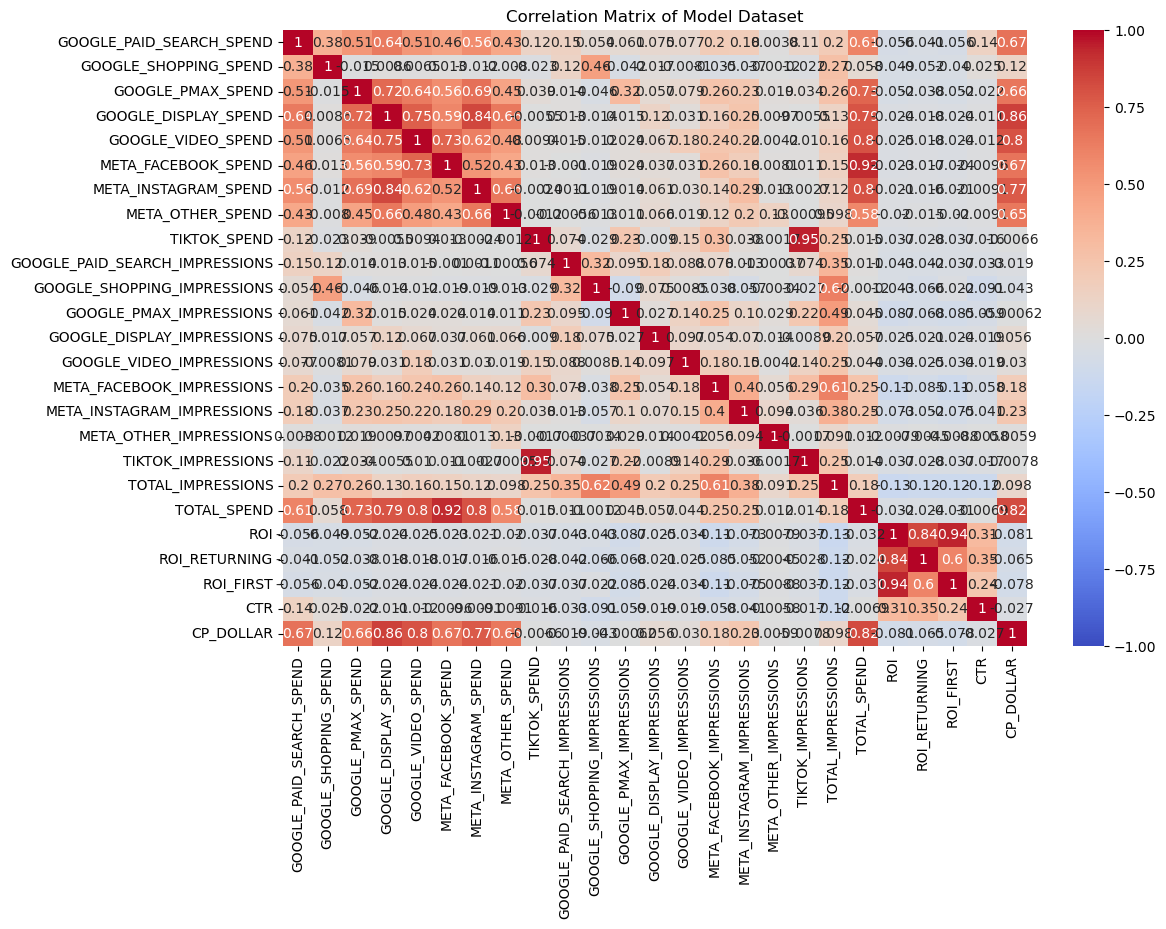

In [21]:
# Correlation matrix
numeric_dataset = new_dataset.select_dtypes(include=[np.number])
correlation_matrix = numeric_dataset.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Model Dataset')
plt.show()

First Purchases (ROI_FIRST) Analysis


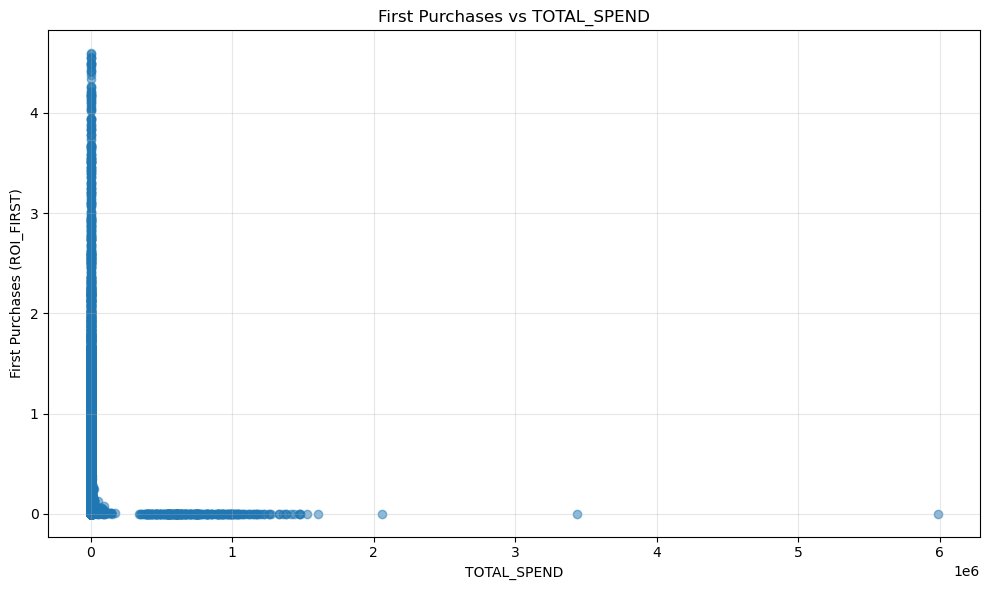

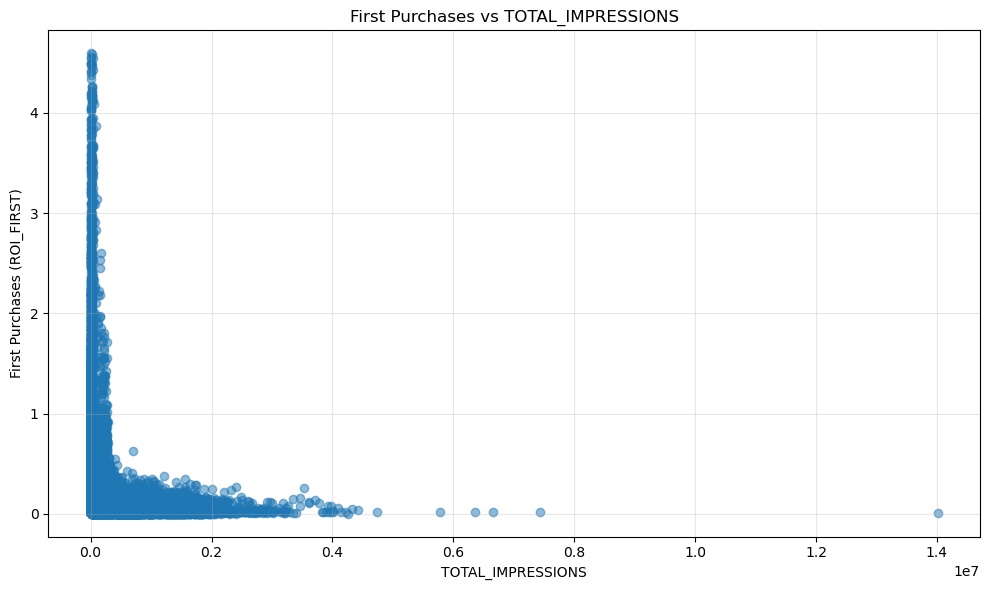

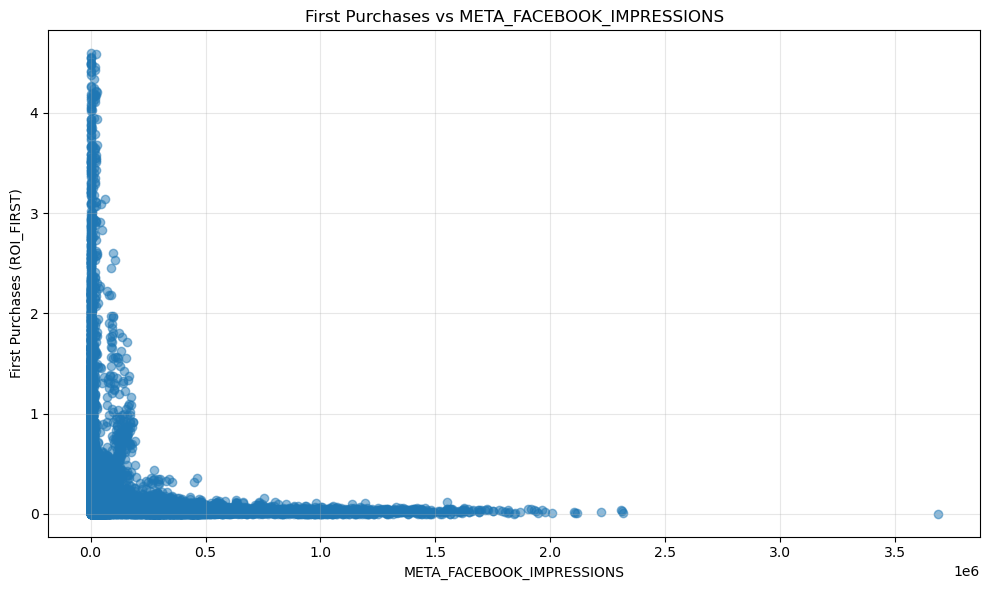

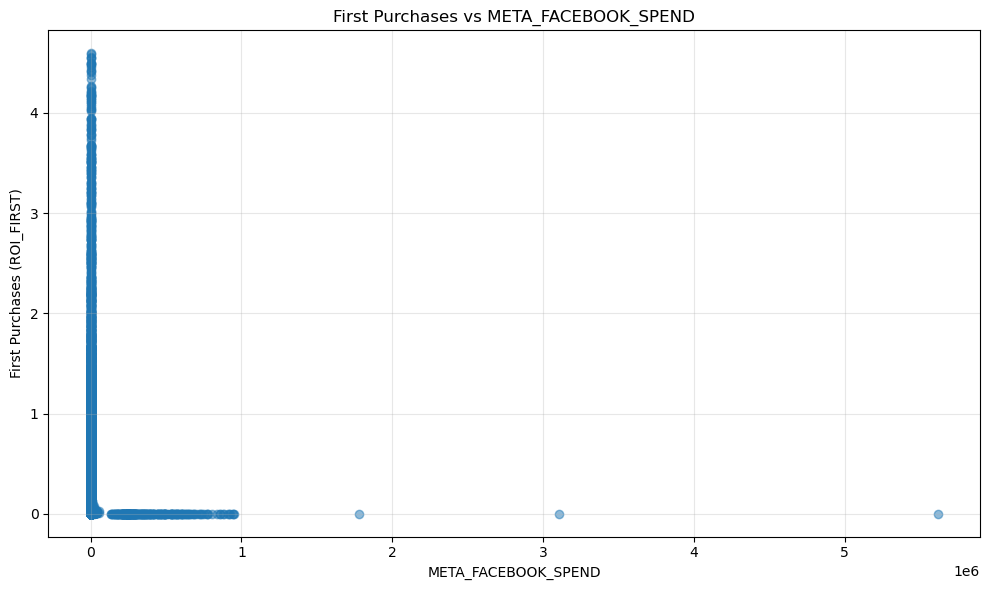

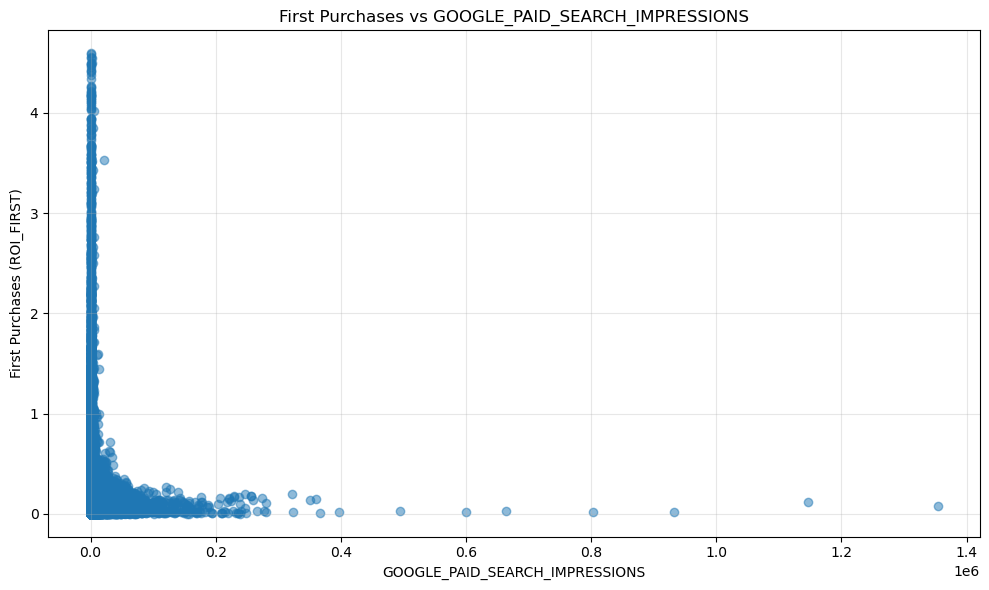

All Purchases (ROI) Analysis


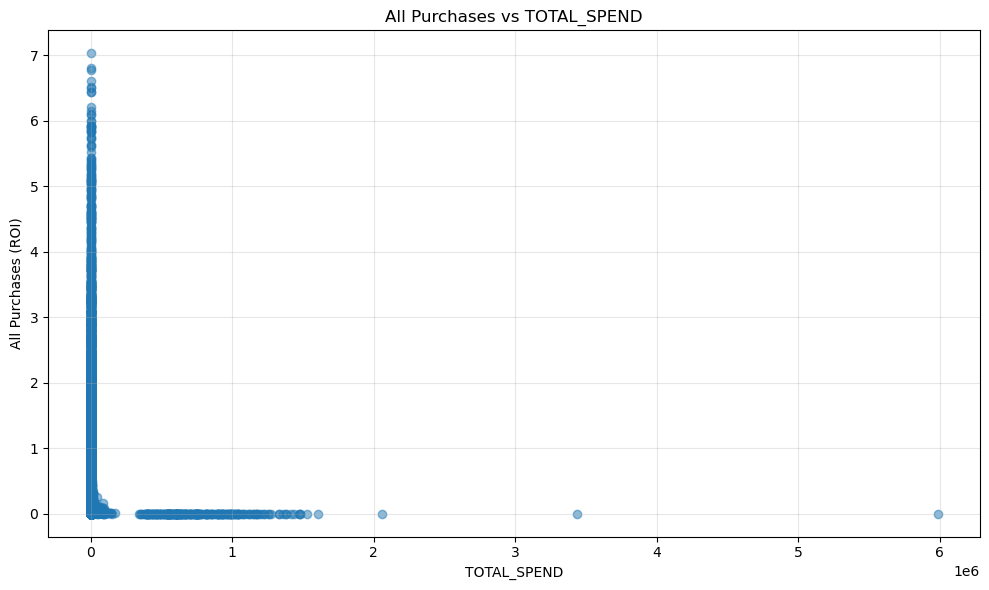

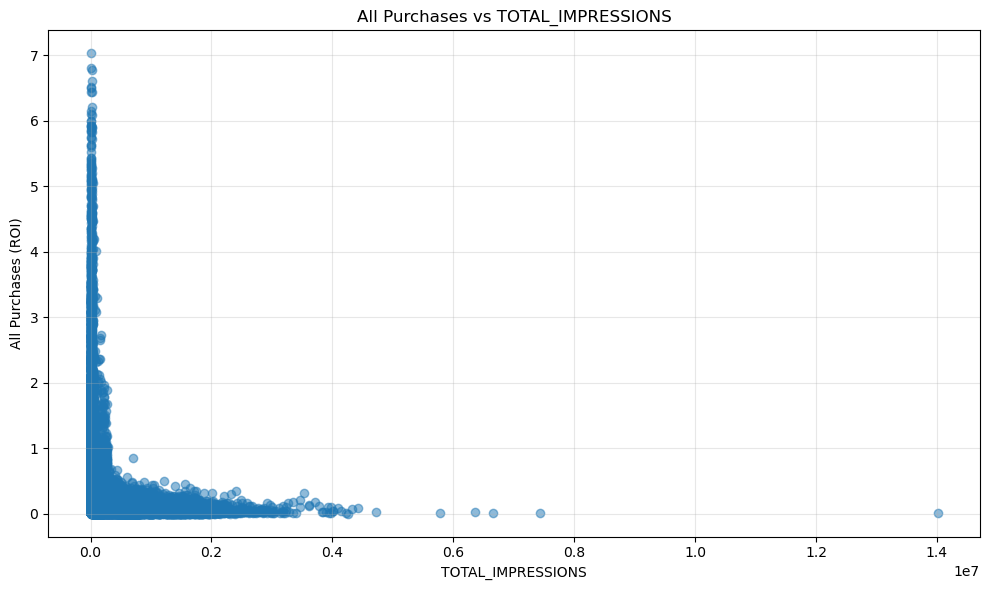

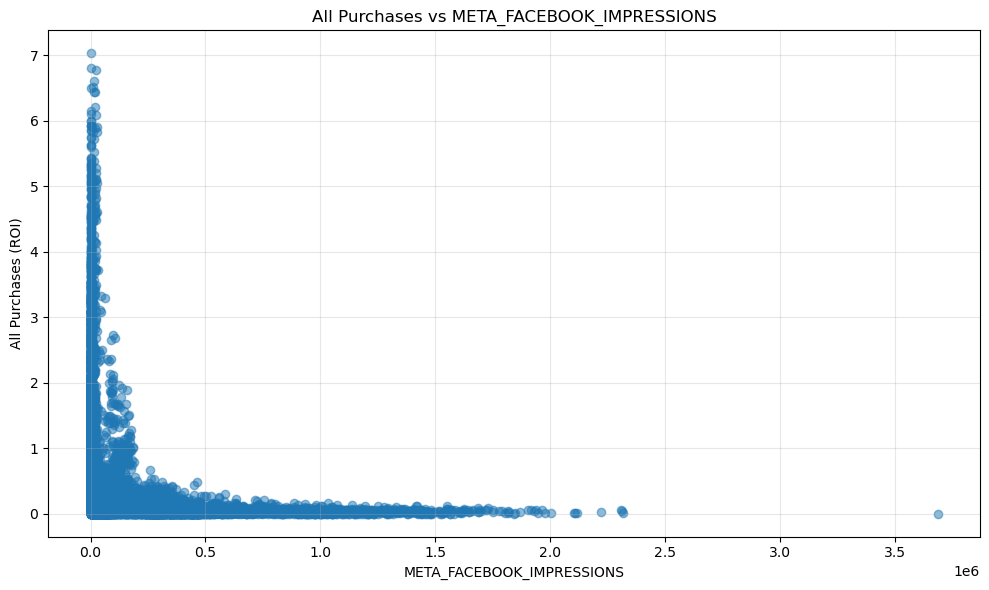

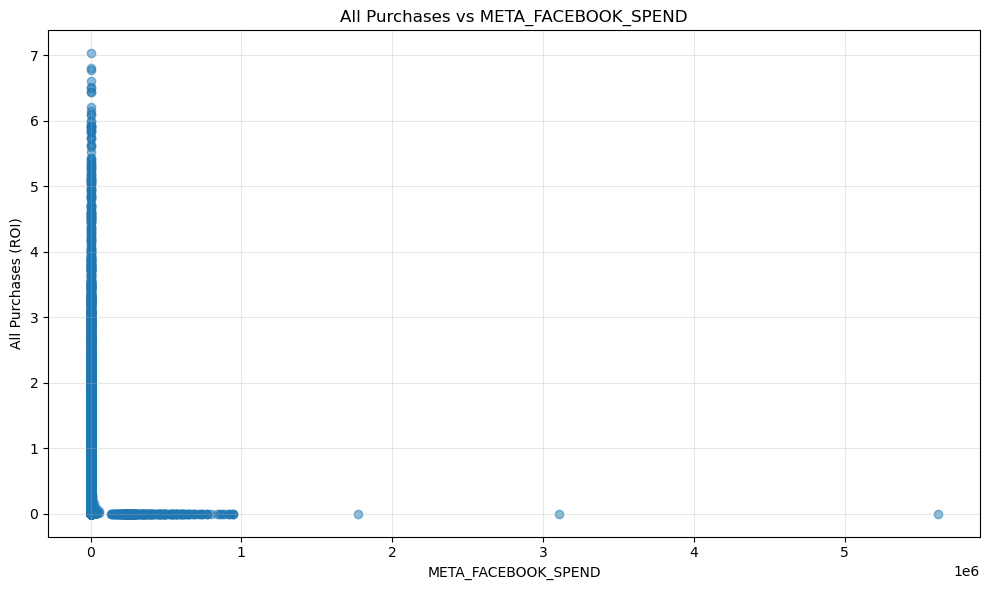

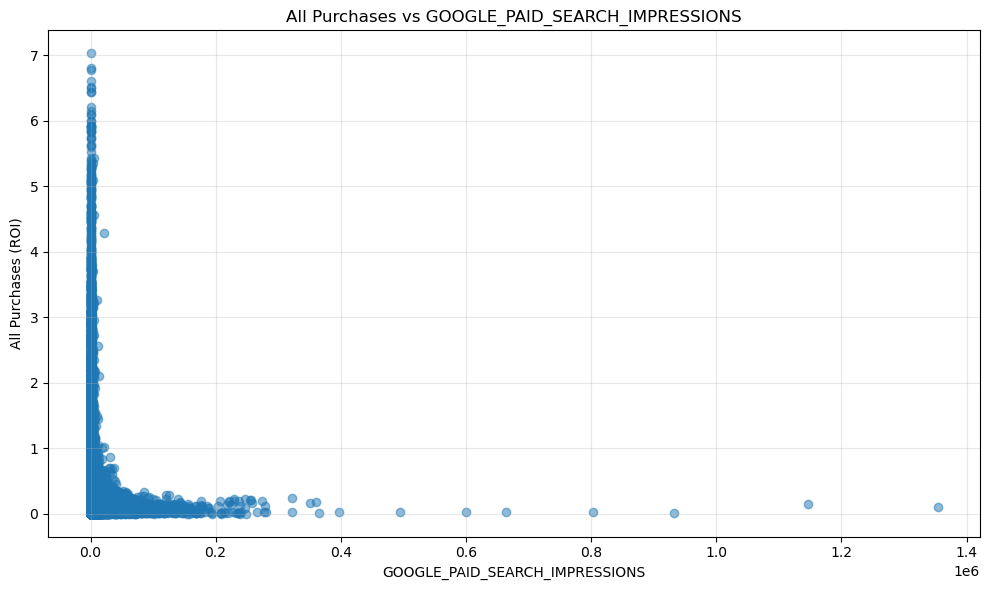

Returning Purchases (ROI_RETURNING) Analysis


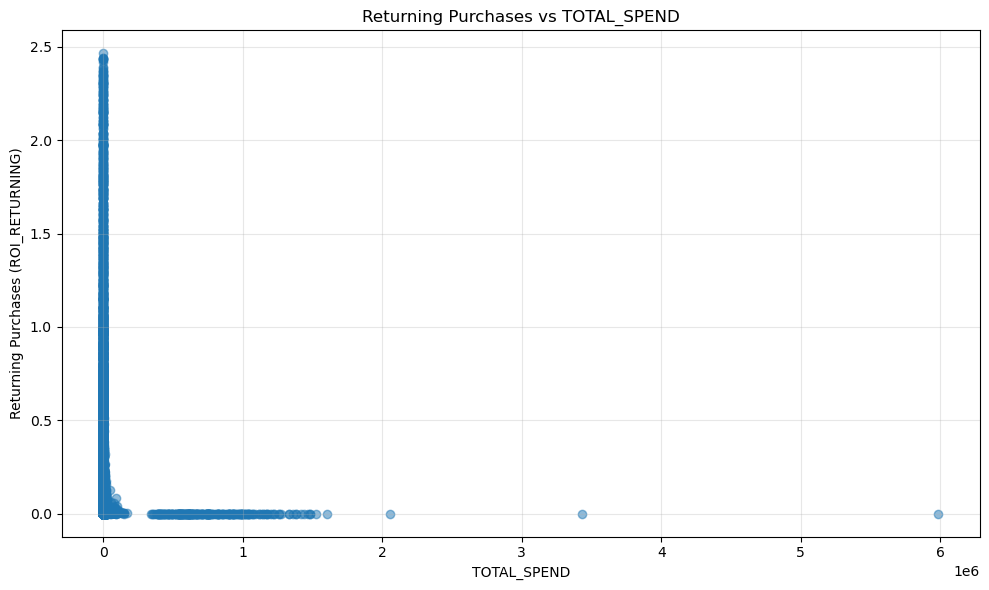

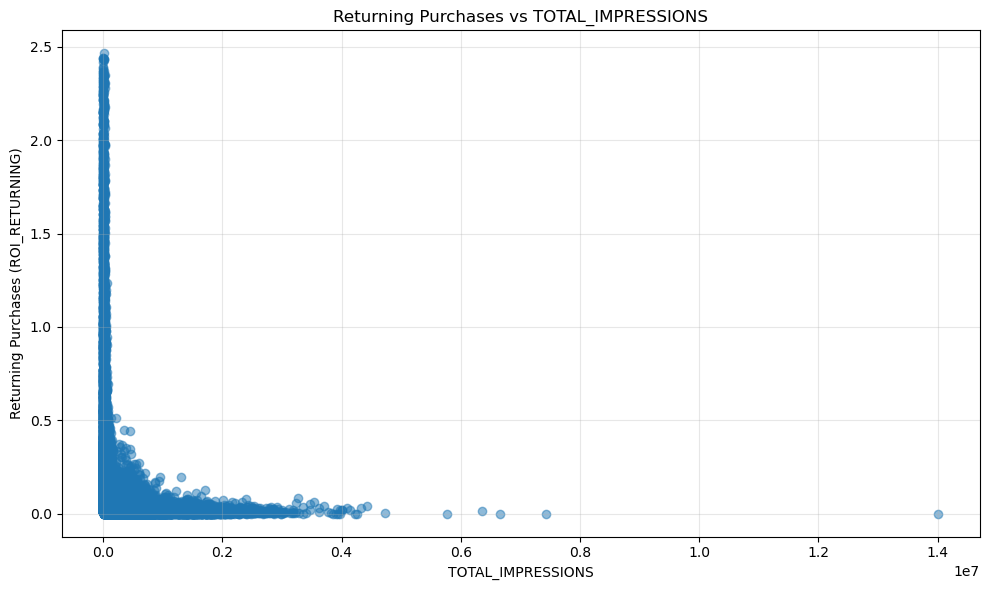

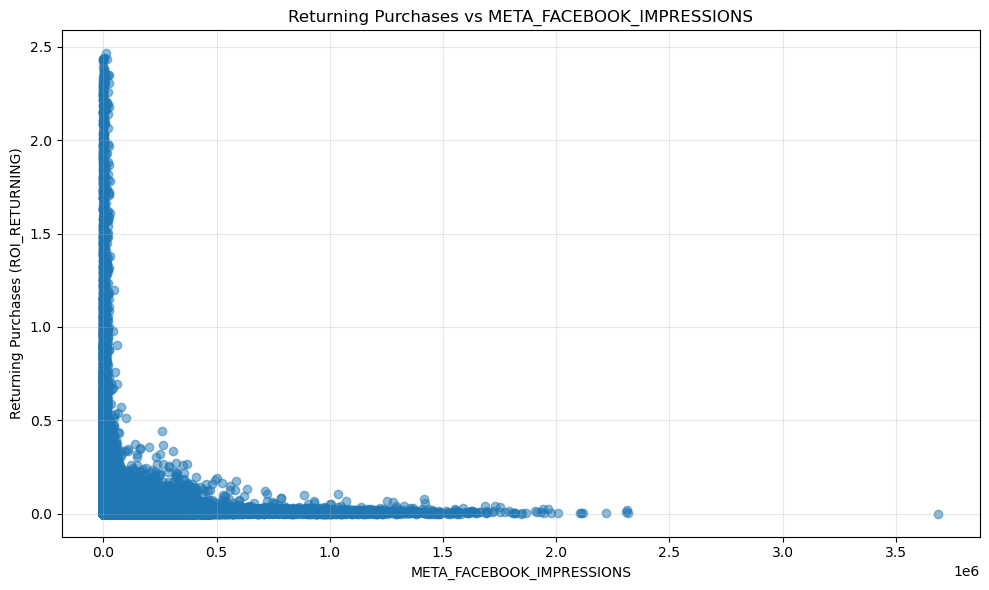

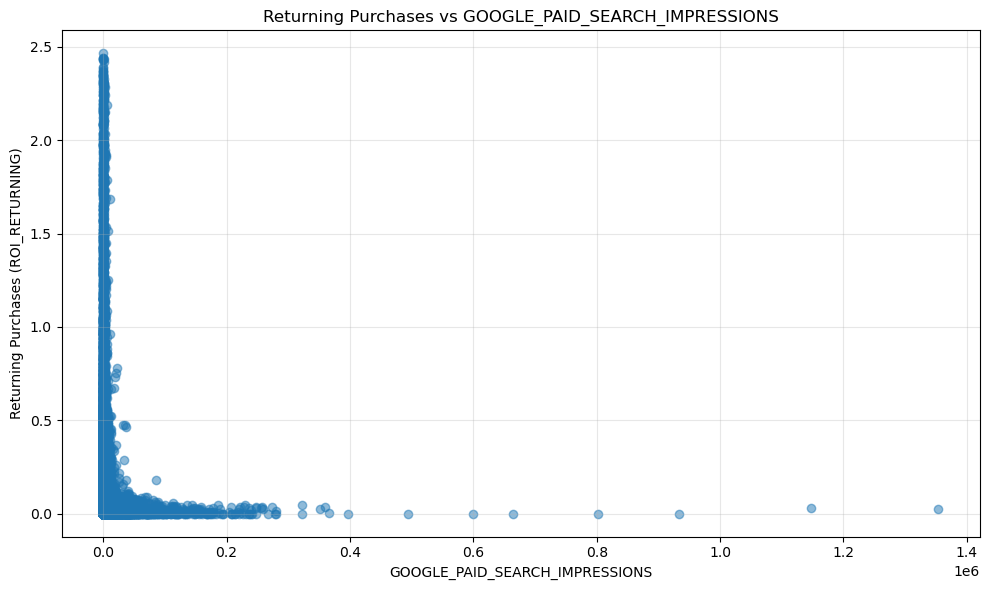

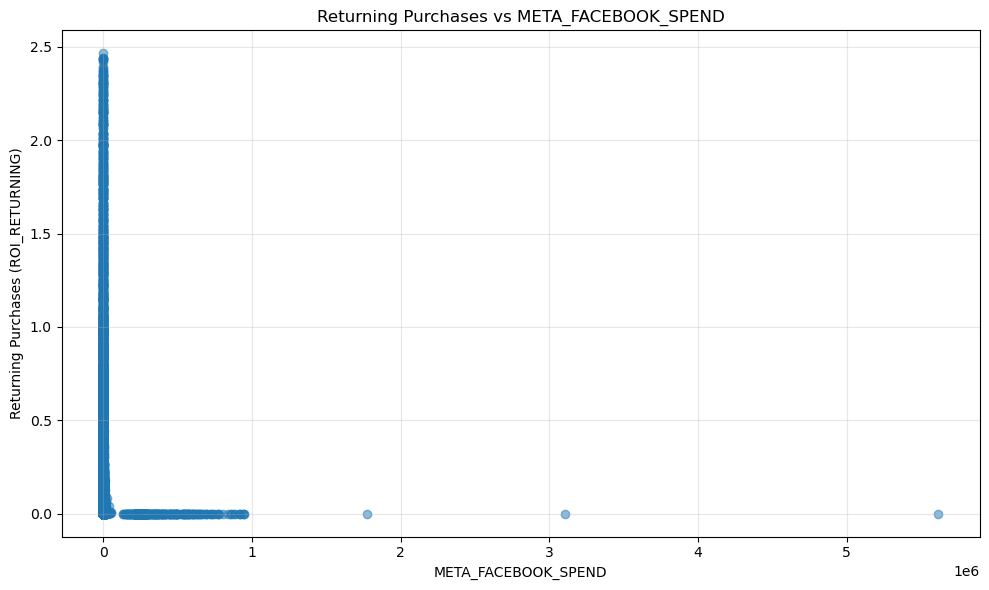

CTR (Click-Through Rate) (CTR) Analysis


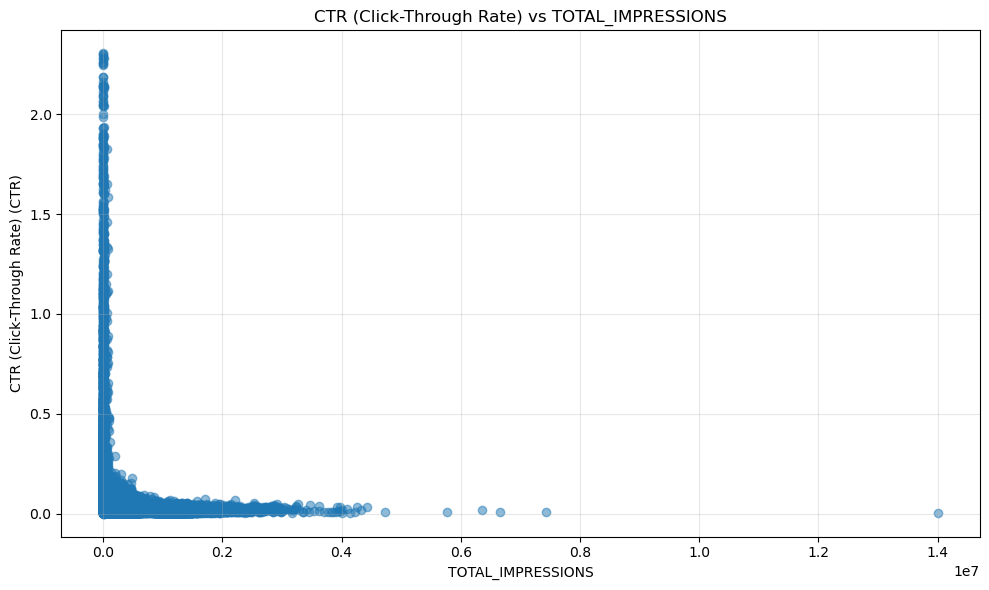

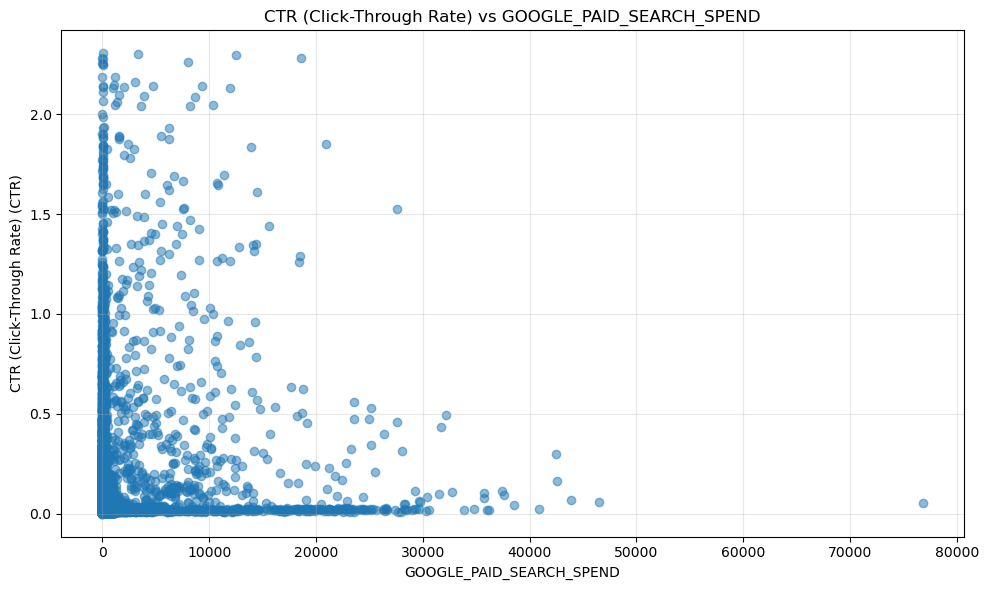

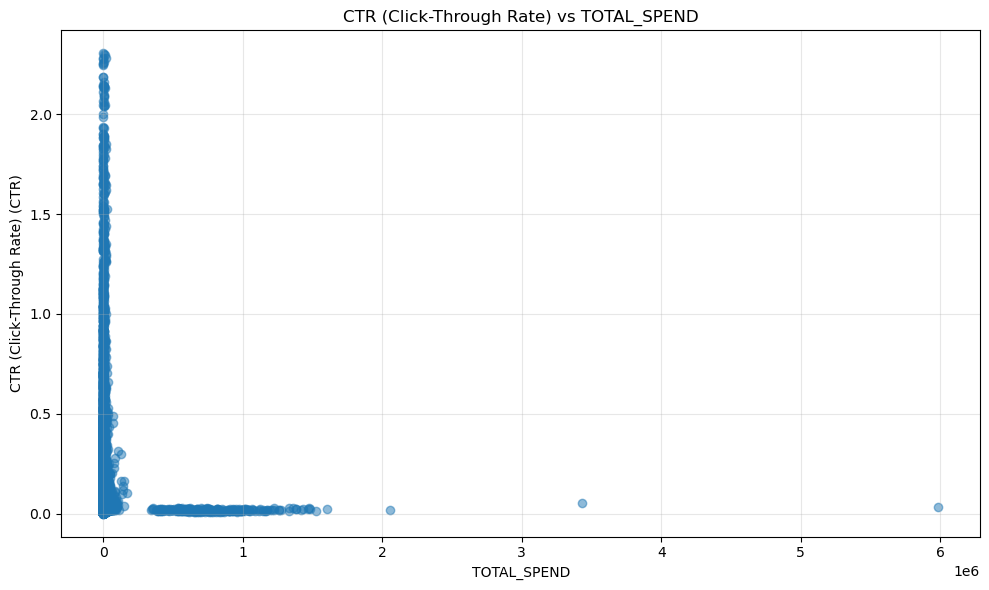

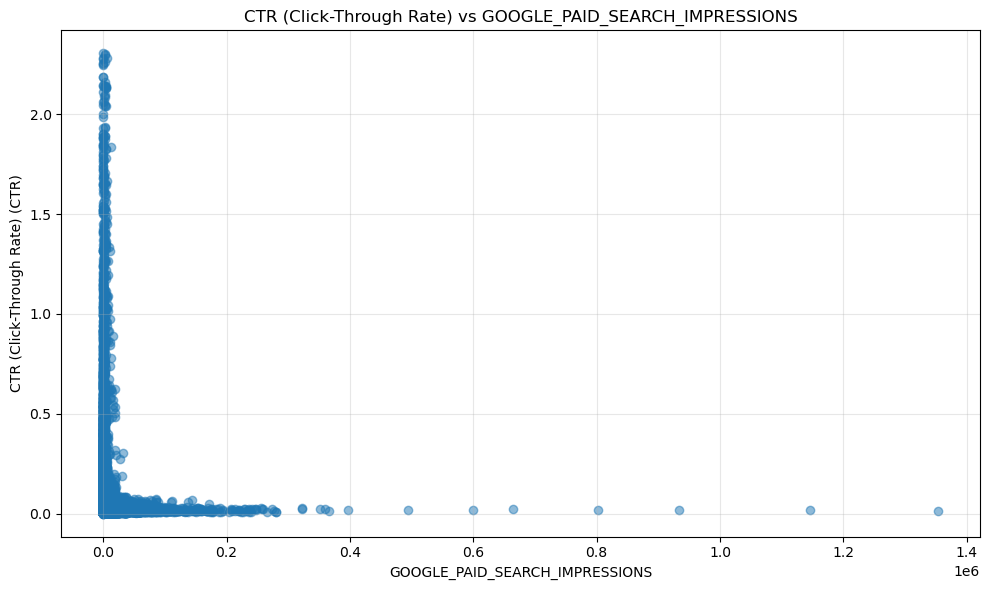

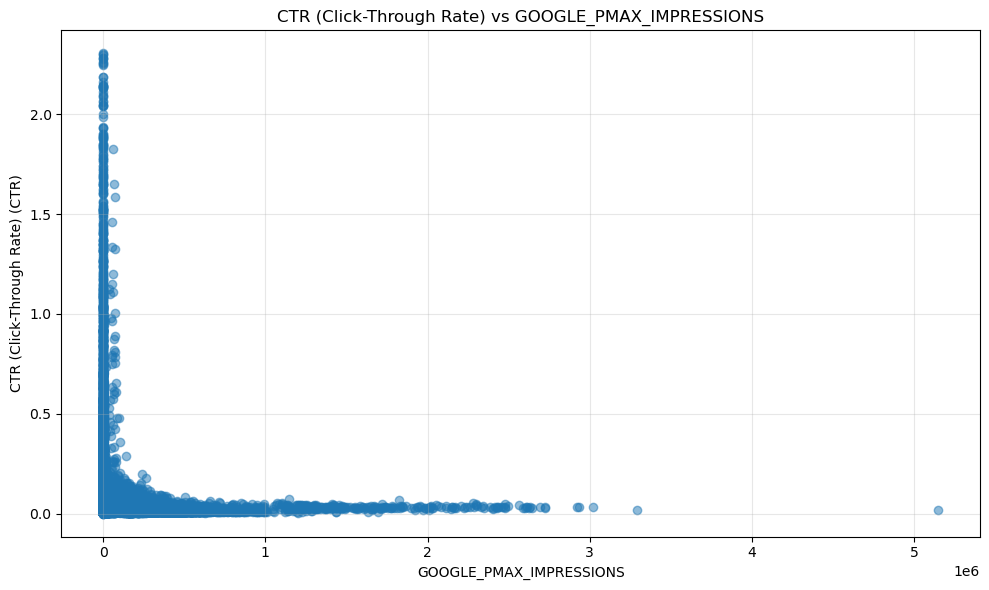

Cost Per Click (CP_DOLLAR) Analysis


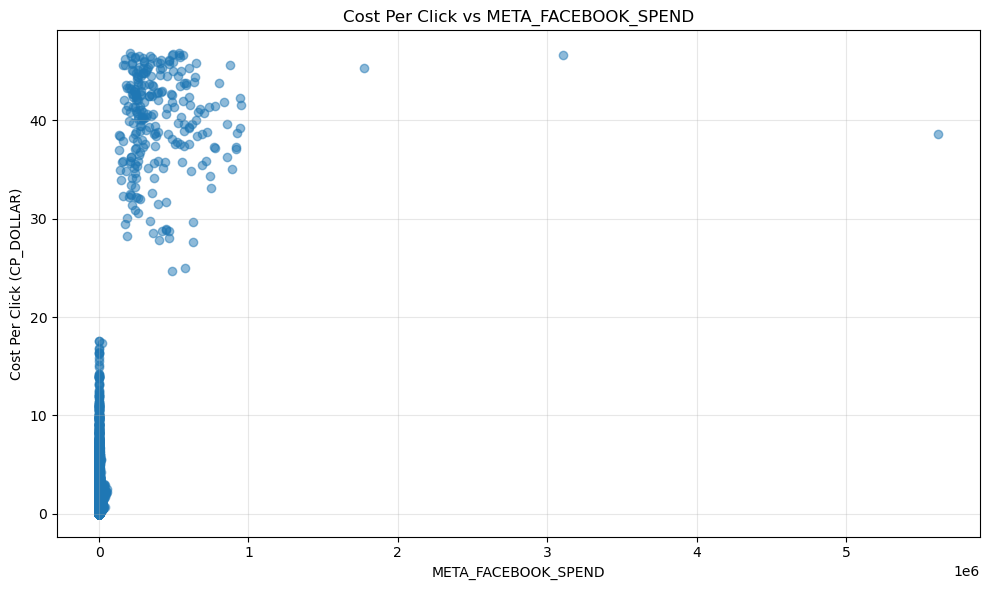

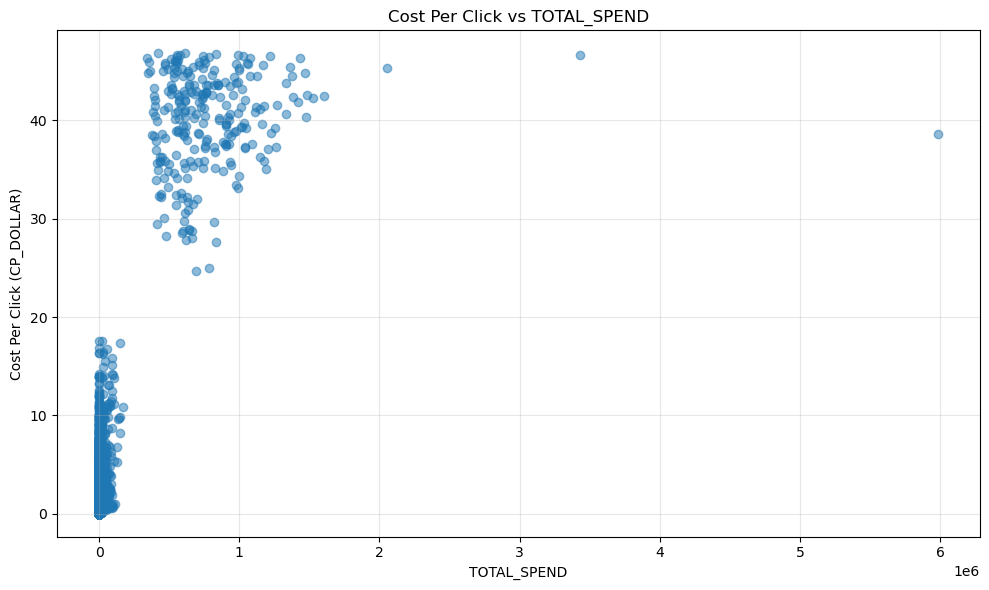

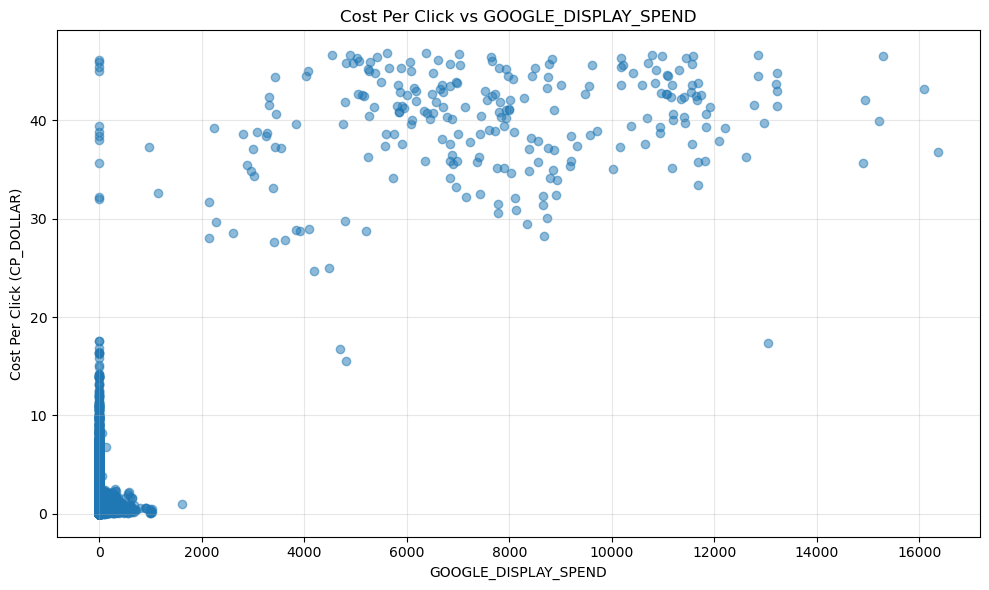

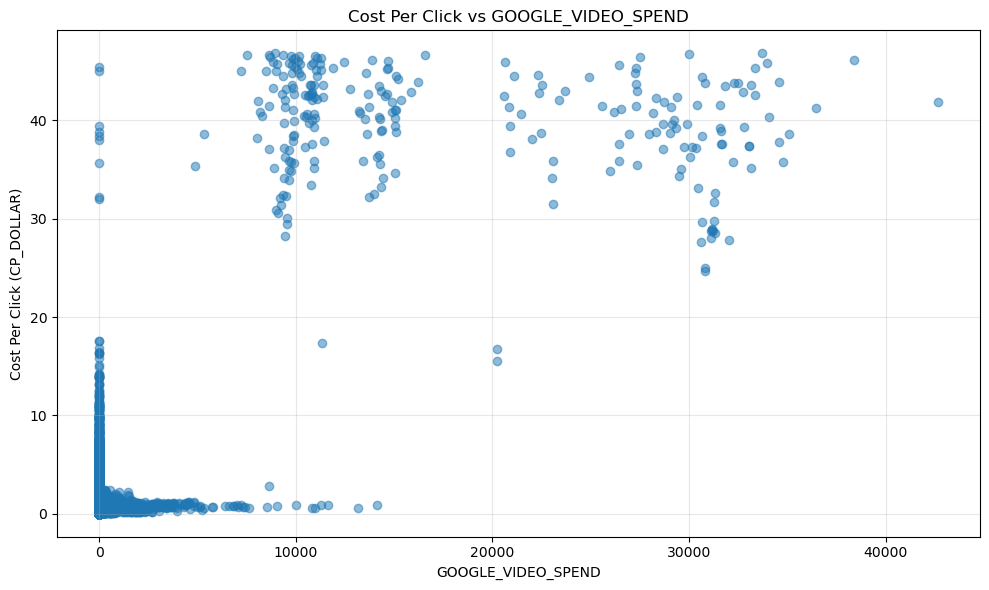

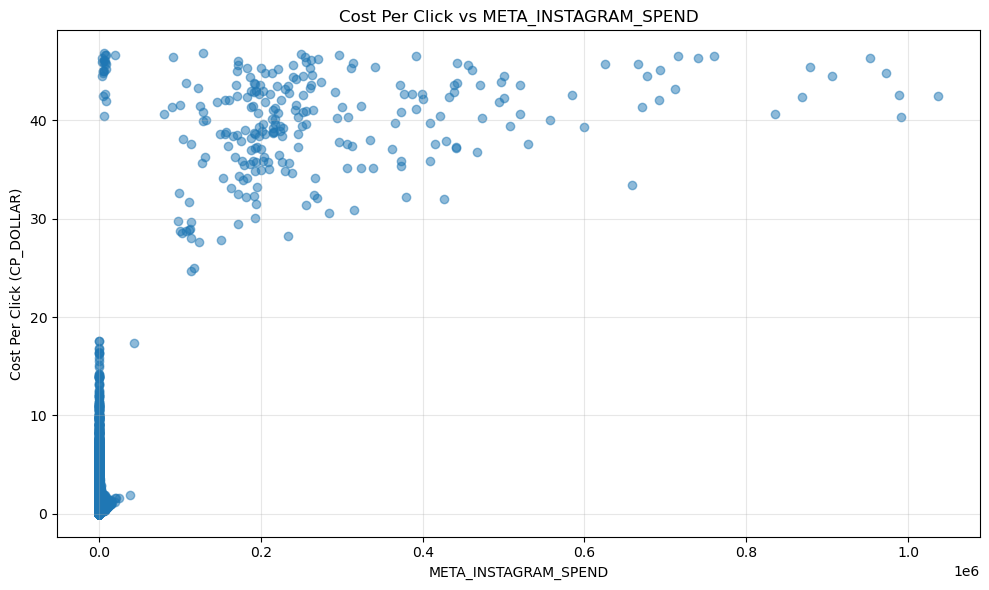

In [22]:
# Define the relationships between target variables and predictor variables
variable_relationships = {
    'ROI_FIRST': {
        'title': 'First Purchases',
        'variables': ['TOTAL_SPEND', 'TOTAL_IMPRESSIONS', 'META_FACEBOOK_IMPRESSIONS', 
                      'META_FACEBOOK_SPEND', 'GOOGLE_PAID_SEARCH_IMPRESSIONS']
    },
    'ROI': {
        'title': 'All Purchases',
        'variables': ['TOTAL_SPEND', 'TOTAL_IMPRESSIONS', 'META_FACEBOOK_IMPRESSIONS', 
                      'META_FACEBOOK_SPEND', 'GOOGLE_PAID_SEARCH_IMPRESSIONS']
    },
    'ROI_RETURNING': {
        'title': 'Returning Purchases',
        'variables': ['TOTAL_SPEND', 'TOTAL_IMPRESSIONS', 'META_FACEBOOK_IMPRESSIONS', 
                      'GOOGLE_PAID_SEARCH_IMPRESSIONS', 'META_FACEBOOK_SPEND']
    },
    'CTR': {
        'title': 'CTR (Click-Through Rate)',
        'variables': ['TOTAL_IMPRESSIONS', 'GOOGLE_PAID_SEARCH_SPEND', 'TOTAL_SPEND', 
                      'GOOGLE_PAID_SEARCH_IMPRESSIONS', 'GOOGLE_PMAX_IMPRESSIONS']
    },
    'CP_DOLLAR': {
        'title': 'Cost Per Click',
        'variables': ['META_FACEBOOK_SPEND', 'TOTAL_SPEND', 'GOOGLE_DISPLAY_SPEND', 
                      'GOOGLE_VIDEO_SPEND', 'META_INSTAGRAM_SPEND']
    }
}

# Create scatter plots for each relationship
for target_var, info in variable_relationships.items():
    print(f"{info['title']} ({target_var}) Analysis")
    
    for predictor_var in info['variables']:
        plt.figure(figsize=(10, 6))
        plt.scatter(new_dataset[predictor_var], new_dataset[target_var], alpha=0.5)
        plt.xlabel(predictor_var)
        plt.ylabel(f"{info['title']} ({target_var})")
        plt.title(f"{info['title']} vs {predictor_var}")
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()


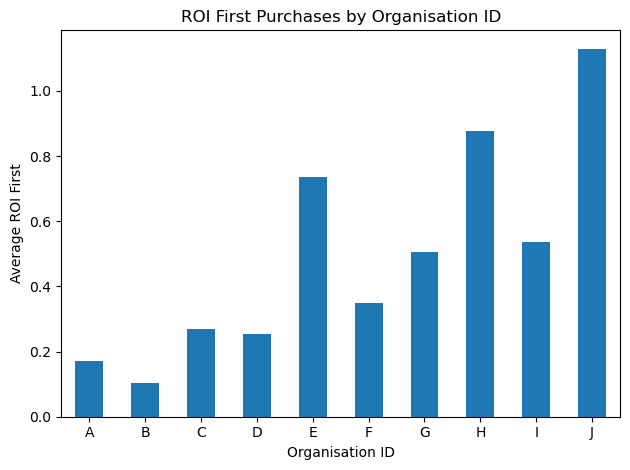

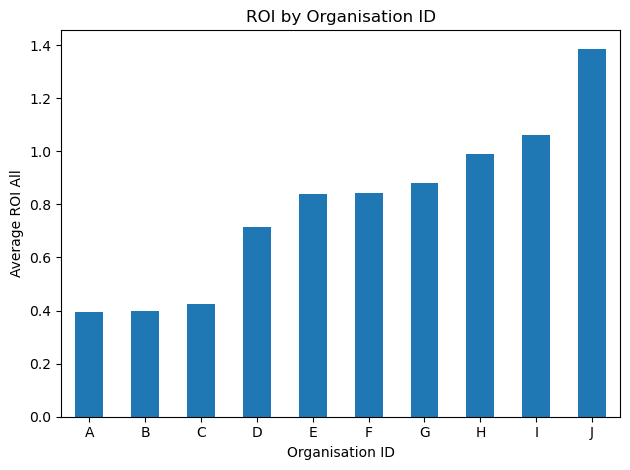

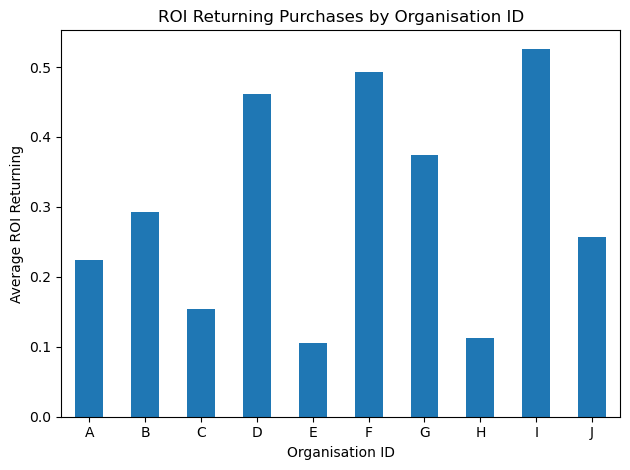

In [23]:
# Top 10 organizations ROI.
org_summary = graphing_dataset.groupby('ORGANISATION_ID')[['ROI_FIRST', 'ROI', 'ROI_RETURNING']].mean()
org_summary['AVG_ROI'] = org_summary.mean(axis=1)
top_10_orgs = org_summary['AVG_ROI'].sort_values().tail(10).index

# I'm going to map them to letters because the id's don't have any meaning
# And they will be easier to spot throughout the 3 graphs.
org_mapping = dict(zip(top_10_orgs, ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']))

# ROI First time customers
org_roi_first = graphing_dataset[graphing_dataset['ORGANISATION_ID'].isin(top_10_orgs)].groupby('ORGANISATION_ID')['ROI_FIRST'].mean()
org_roi_first = org_roi_first.loc[top_10_orgs]
org_roi_first.index = org_roi_first.index.map(org_mapping)
org_roi_first.plot(kind='bar')
plt.title('ROI First Purchases by Organisation ID')
plt.xlabel('Organisation ID')
plt.ylabel('Average ROI First')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# ROI
org_roi_all = graphing_dataset[graphing_dataset['ORGANISATION_ID'].isin(top_10_orgs)].groupby('ORGANISATION_ID')['ROI'].mean()
org_roi_all = org_roi_all.loc[top_10_orgs]
org_roi_all.index = org_roi_all.index.map(org_mapping)
org_roi_all.plot(kind='bar')
plt.title('ROI by Organisation ID')
plt.xlabel('Organisation ID')
plt.ylabel('Average ROI All')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# ROI Returning customers
org_roi_returning = graphing_dataset[graphing_dataset['ORGANISATION_ID'].isin(top_10_orgs)].groupby('ORGANISATION_ID')['ROI_RETURNING'].mean()
org_roi_returning = org_roi_returning.loc[top_10_orgs]
org_roi_returning.index = org_roi_returning.index.map(org_mapping)
org_roi_returning.plot(kind='bar')
plt.title('ROI Returning Purchases by Organisation ID')
plt.xlabel('Organisation ID')
plt.ylabel('Average ROI Returning')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

/var/folders/y2/rgpx9w9s1hs5bjjw9s3zpq4c0000gn/T/ipykernel_34098/2612336507.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  org_avg_unit_price = top_10_data.groupby('ORGANISATION_ID').apply(


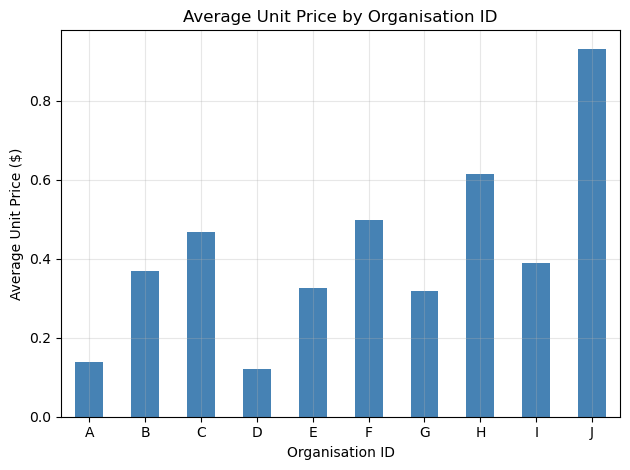

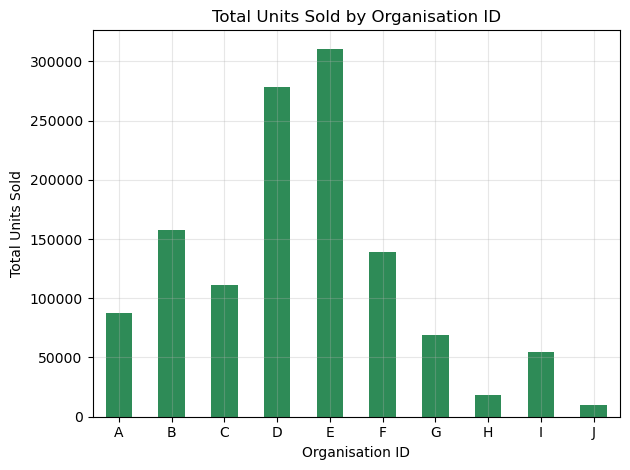

In [24]:
# Filter graphing dataset for top 10 orgs
top_10_data = graphing_dataset[graphing_dataset['ORGANISATION_ID'].isin(top_10_orgs)]

# Calculate average unit price
org_avg_unit_price = top_10_data.groupby('ORGANISATION_ID').apply(
    lambda x: x['ALL_PURCHASES'].sum() / x['ALL_PURCHASES_UNITS'].sum()
)
org_avg_unit_price = org_avg_unit_price.loc[top_10_orgs]
org_avg_unit_price.index = org_avg_unit_price.index.map(org_mapping)

# Calculate units sold
org_units_sold = top_10_data.groupby('ORGANISATION_ID')['ALL_PURCHASES_UNITS'].sum()
org_units_sold = org_units_sold.loc[top_10_orgs]
org_units_sold.index = org_units_sold.index.map(org_mapping)

# Plot 1: Average Unit Price
org_avg_unit_price.plot(kind='bar', color='steelblue')
plt.title('Average Unit Price by Organisation ID')
plt.xlabel('Organisation ID')
plt.ylabel('Average Unit Price ($)')
plt.tick_params(axis='x', rotation=0)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Plot 2: Sum of Units Sold
org_units_sold.plot(kind='bar', color='seagreen')
plt.title('Total Units Sold by Organisation ID')
plt.xlabel('Organisation ID')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


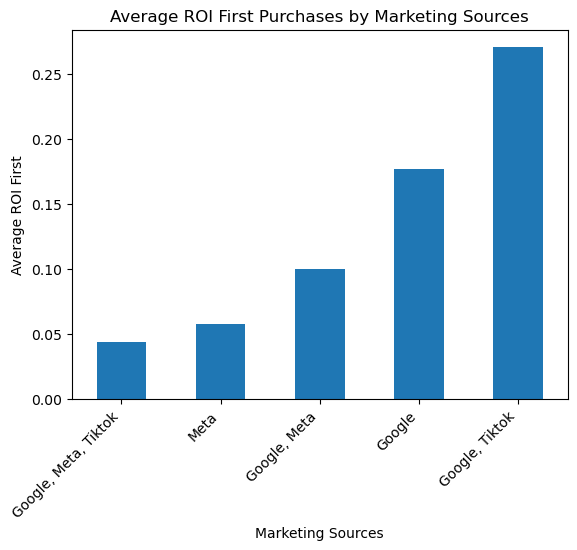

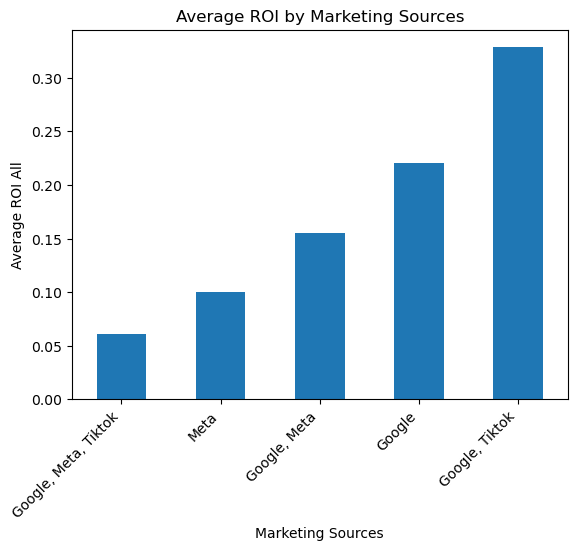

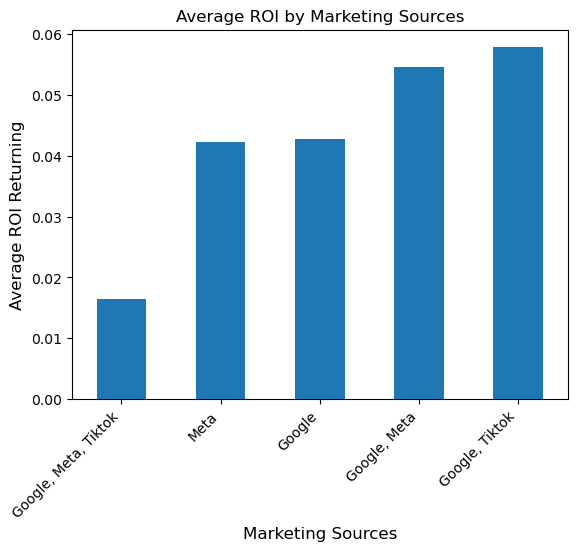

In [25]:
# Marketing source vs ROI.

# ROI of first customers
mkt_roi_first = new_dataset.groupby('ORGANISATION_MARKETING_SOURCES')['ROI_FIRST'].mean().sort_values()
mkt_roi_first.plot(kind='bar')
plt.title('Average ROI First Purchases by Marketing Sources')
plt.xlabel('Marketing Sources')
plt.ylabel('Average ROI First')
plt.xticks(rotation=45, ha='right')
plt.show()

# ROI
mkt_roi_all = new_dataset.groupby('ORGANISATION_MARKETING_SOURCES')['ROI'].mean().sort_values()
mkt_roi_all.plot(kind='bar')
plt.title('Average ROI by Marketing Sources')
plt.xlabel('Marketing Sources')
plt.ylabel('Average ROI All')
plt.xticks(rotation=45, ha='right')
plt.show()

# ROI of returning customers
mkt_roi_returning = new_dataset.groupby('ORGANISATION_MARKETING_SOURCES')['ROI_RETURNING'].mean().sort_values()
mkt_roi_returning.plot(kind='bar')
plt.title('Average ROI by Marketing Sources')
plt.xlabel('Marketing Sources', fontsize=12)
plt.ylabel('Average ROI Returning', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()